In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

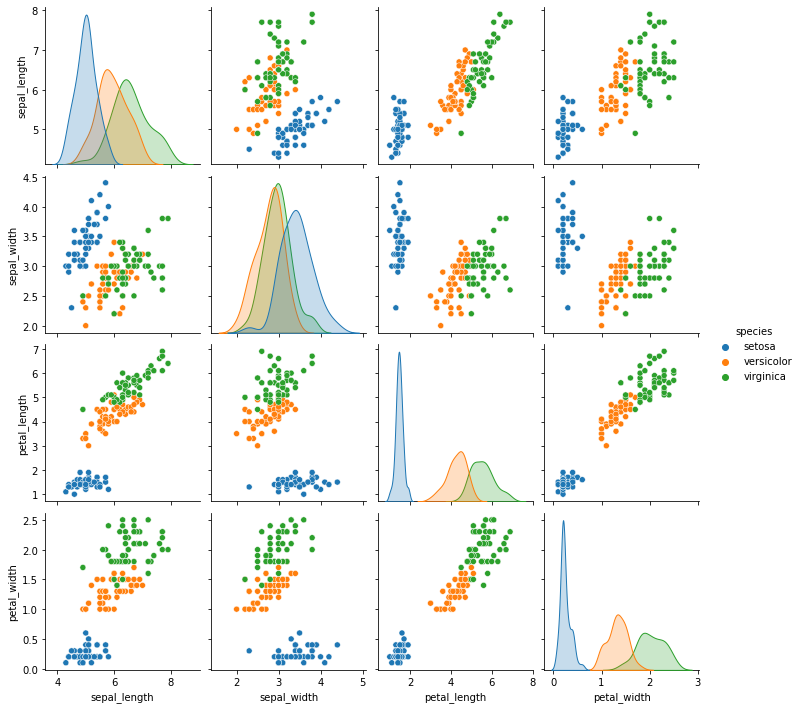

In [17]:
sns.pairplot(df , hue = "species")

In [18]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [19]:
df = df[(df["species"]=="setosa") | (df["species"]=="versicolor")]
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [20]:
df["species"].value_counts()

setosa        50
versicolor    50
Name: species, dtype: int64

 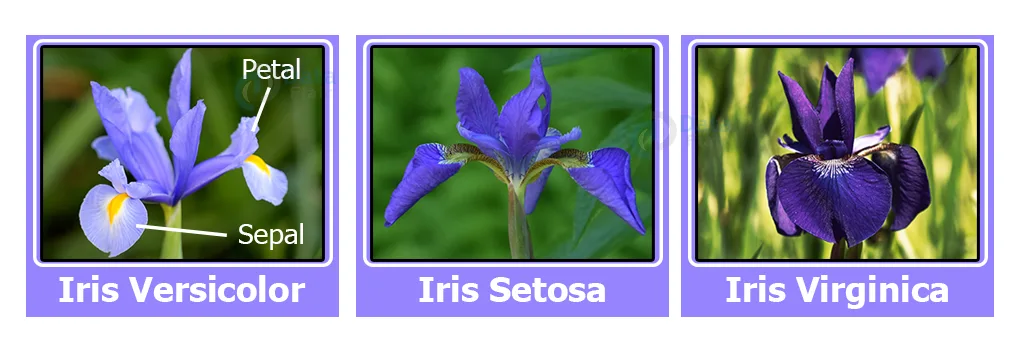

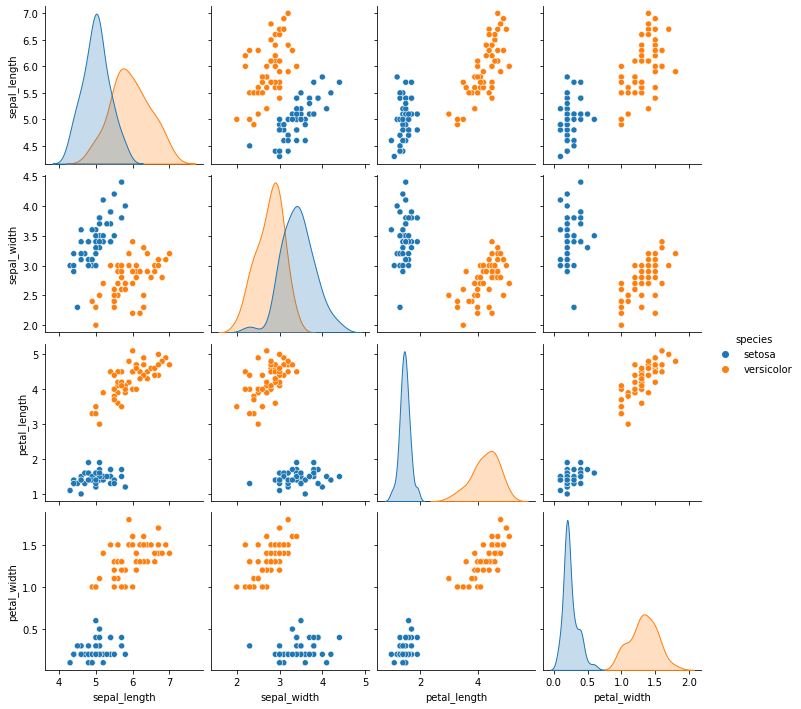

In [21]:
sns.pairplot(df , hue = "species")

In [24]:
df["species"] = df["species"].replace({"setosa":1,"versicolor":0})
df["species"].value_counts()

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_8208\3993027600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["species"] = df["species"].replace({"setosa":1,"versicolor":0})


1    50
0    50
Name: species, dtype: int64

<AxesSubplot:>

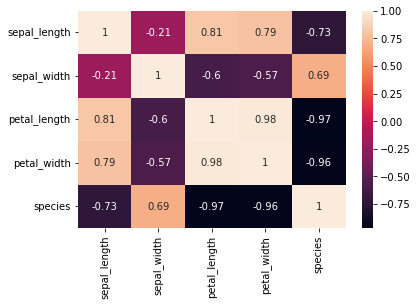

In [31]:
sns.heatmap(df.corr() , annot = True)

There is only 100 data we are going with outlier analysis

In [27]:
X = df.drop("species" , axis = 1).values
Y = df[["species"]].values

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [37]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=42)
lg.fit(X_train , Y_train.ravel())

LogisticRegression(random_state=42)

In [42]:
Y_pred = lg.predict(X_test)
Y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [43]:
from sklearn import metrics
metrics.confusion_matrix(Y_test , Y_pred)

array([[ 8,  0],
       [ 0, 12]], dtype=int64)

In [47]:
metrics.accuracy_score(Y_test , Y_pred)

1.0

In [49]:
print(metrics.classification_report(Y_test , Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [50]:
Y_prob = lg.predict_proba(X_test)[::,1]

In [52]:
fpr, tpr, _ = metrics.roc_curve(Y_test.ravel(),  Y_prob)

In [61]:
fpr

array([0., 0., 0., 1.])

In [62]:
tpr

array([0.        , 0.08333333, 1.        , 1.        ])

In [63]:
_

array([1.99574460e+00, 9.95744600e-01, 9.50464425e-01, 1.26086875e-03])

In [55]:
auc = metrics.roc_auc_score(Y_test.ravel(),  Y_prob)
auc

1.0

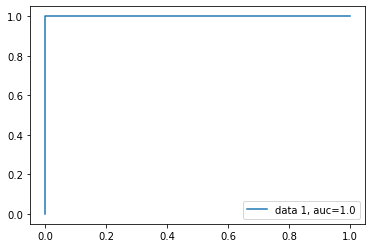

In [60]:
plt.plot(fpr,tpr, label="data 1, auc="+str(auc))
plt.legend()
plt.show()

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.



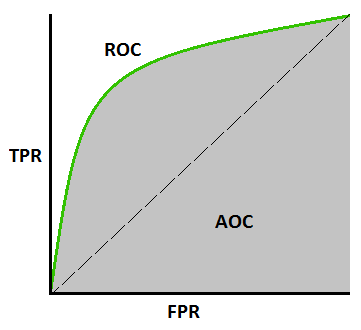

How to speculate about the performance of the model?
An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability. In fact, it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means the model has no class separation capacity whatsoever.

Let’s interpret the above statements.

As we know, ROC is a curve of probability. So let's plot the distributions of those probabilities:

Note: Red distribution curve is of the positive class (patients with disease) and the green distribution curve is of the negative class(patients with no disease).

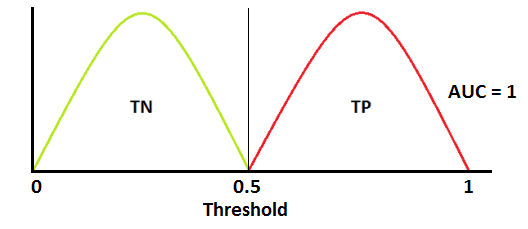

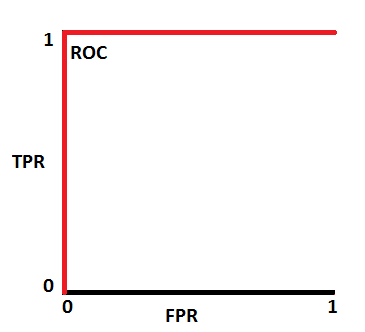

This is an ideal situation. When two curves don’t overlap at all means model has an ideal measure of separability. It is perfectly able to distinguish between positive class and negative class.

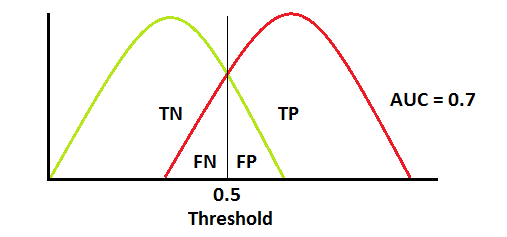

When two distributions overlap, we introduce type 1 and type 2 errors. Depending upon the threshold, we can minimize or maximize them. When AUC is 0.7, it means there is a 70% chance that the model will be able to distinguish between positive class and negative class.

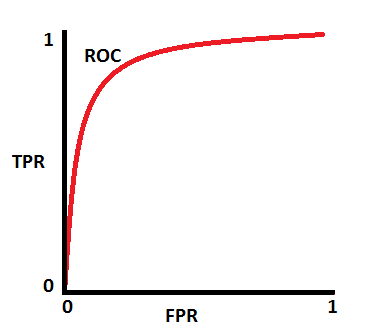

When two distributions overlap, we introduce type 1 and type 2 errors. Depending upon the threshold, we can minimize or maximize them. When AUC is 0.7, it means there is a 70% chance that the model will be able to distinguish between positive class and negative class.

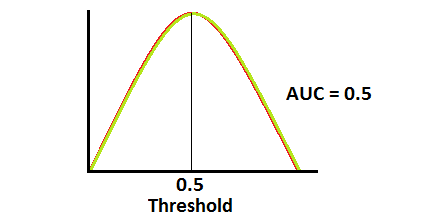

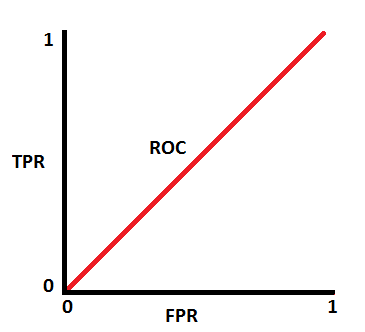

This is the worst situation. When AUC is approximately 0.5, the model has no discrimination capacity to distinguish between positive class and negative class.

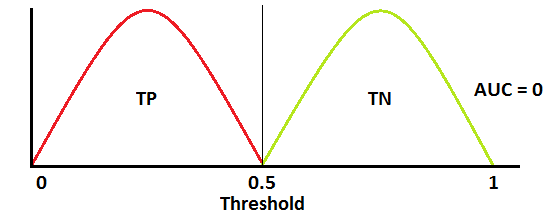

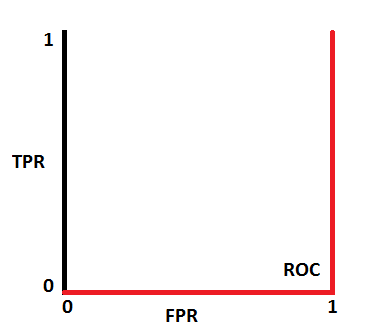